In [2]:
#import libaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [3]:
#read in the data
dataTrain = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
dataTest = np.loadtxt('IDSWeedCropTest.csv', delimiter=',')

In [4]:
#split input variables and labels
x_train = dataTrain[:, :-1]
y_train = dataTrain[:, -1]
x_test = dataTest[:, :-1]
y_test = dataTest[:, -1]

In [5]:
#Apply a nearest neighbor classier (1-NN) to the data.

#applying 1NN means k=1
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Compute accuracy on the training set
train_accuracy = knn.score(x_train, y_train)
print('train_accuracy: ', train_accuracy)

#Compute accuracy on the test set
test_accuracy = knn.score(x_test, y_test)
print('test_accuracy: ', test_accuracy)

print('\t')

train_accuracy:  1.0
test_accuracy:  0.945993031358885
	


In [6]:
#You are supposed find a good value for k from {1; 3; 5; 7; 9; 11}. For
#every choice of k, estimate the performance of the k-NN classier using 5-fold cross-validation. Pick
#the k with the lowest average 0-1 loss (classification error), which we will call kbest in the following.
#Only use the training data in the cross-validation process to generate the folds.

In [7]:

#list of k values from task description
neighbors = [1, 3, 5, 7, 9, 11]

#empty list that will hold cv scores
cv_score = []

#perform 5-fold cross validation for each k.
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_score.append(scores.mean())

print('cv_scores', cv_score)

#changing to classification error as it was asked to pick the k with the lowest average 0-1 loss (classication error)
CE = [1 - x for x in cv_score]

print('Please see diagram')

cv_scores [0.958009600240006, 0.9630146753668842, 0.957014675366884, 0.9510046251156279, 0.9440145753643842, 0.9440045751143777]
Please see diagram


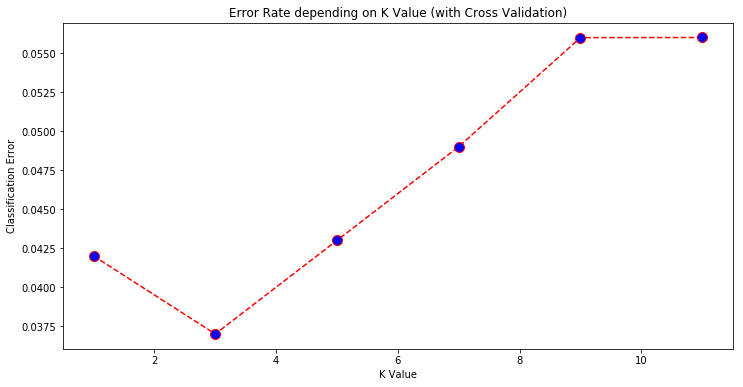

The diagram already reveals kbest as it shows which k has the lowest average 0-1 loss. However, this might not always be the best way to determine kbest as the results might be less clear with other data.
	
I want to make this very clear in this assignment, so I provide the values and then select the k with the lowest Classification Error
Classification Error:  [0.04199039975999397, 0.03698532463311577, 0.042985324633115995, 0.04899537488437211, 0.055985424635615844, 0.05599542488562226]


In [8]:
#creating a diagram that shows the average 0-1 loss (classication error) depending on the k value
plt.figure(figsize=(12, 6))
plt.plot(range(1, 13, 2), CE, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10) #change range to (1, 50, 2) if you use the odd list of k from 1 to 50 (line 57)
plt.title('Error Rate depending on K Value (with Cross Validation)')
plt.xlabel('K Value')
plt.ylabel('Classification Error')
plt.show()

print('The diagram already reveals kbest as it shows which k has the lowest average 0-1 loss. However, this might not always be the best way to determine kbest as the results might be less clear with other data.')

print('\t')
print('I want to make this very clear in this assignment, so I provide the values and then select the k with the lowest Classification Error')
print('Classification Error: ', CE)

In [9]:
#Determining best k
optimal_k = neighbors[CE.index(min(CE))]
print("The k with the lowest average 0-1 loss (classication error) from k {1,3,5,7,9,11} (kbest) = %d" % optimal_k)

print('\t')

The k with the lowest average 0-1 loss (classication error) from k {1,3,5,7,9,11} (kbest) = 3
	


In [10]:
# estimate classifier performance on IDSWeedCropTest.csv: build a kbest-NN classier using the complete training data set IDSWeedCropTrain.csv and evaluate
# it on the independent test set IDSWeedCropTest.csv


knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
#Compute accuracy on the training set
train_accuracy = knn.score(x_train, y_train)
print('Train Accuracy of k=3: ', train_accuracy)

#Compute accuracy on the test set
test_accuracy = knn.score(x_test, y_test)
print('Test Accuracy of k=3: ', test_accuracy)

print('\t')

Train Accuracy of k=3:  0.971
Test Accuracy of k=3:  0.9494773519163763
	


In [12]:
#Setup arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(x_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    print('train acc.', train_accuracy[i])
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)
    print('test acc.', test_accuracy[i])

train acc. 1.0
test acc. 0.945993031358885
train acc. 0.971
test acc. 0.9494773519163763
train acc. 0.967
test acc. 0.945993031358885
train acc. 0.96
test acc. 0.9390243902439024
train acc. 0.956
test acc. 0.9407665505226481
train acc. 0.953
test acc. 0.9372822299651568


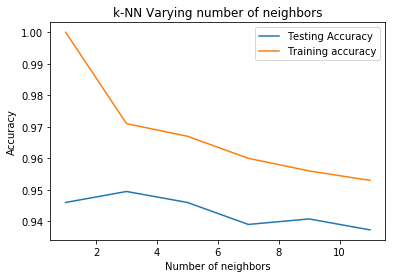

In [13]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [14]:
#Center and normalize the data and repeat the model selection and
#classication process from Exercise 2 and Exercise 3.

#choosing version1
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_N = scaler.transform(x_train)
x_test_N = scaler.transform(x_test)

In [15]:
neighbors = [1, 3, 5, 7, 9, 11]

# empty list that will hold cv scores
cv_score = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_N, y_train, cv=5, scoring='accuracy')
    cv_score.append(scores.mean())


In [16]:
# changing to misclassification error
MSE = [1 - x for x in cv_score]
print('Classification error: ', MSE)

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

print('Train and Test Accuracy when choosing k = 3 on the normalzed data')

Classification error:  [0.03997537438435972, 0.035990249756243875, 0.04199024975624399, 0.04498527463186586, 0.046990299757493914, 0.05099029975749381]
The optimal number of neighbors is 3
Train and Test Accuracy when choosing k = 3 on the normalzed data


In [17]:
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(x_train_N, y_train)

#Compute accuracy on the training set
train_accuracy_N = knn.score(x_train_N, y_train)
print('Train Accuracy of k=3 after normalization: ', train_accuracy_N)

Train Accuracy of k=3 after normalization:  0.972


In [18]:
#Compute accuracy on the test set
test_accuracy_N = knn.score(x_test_N, y_test)
print('Test Accuracy of k=3 after normallization: ', test_accuracy_N)

Test Accuracy of k=3 after normallization:  0.9599303135888502
